In [37]:
# Importing os and setting the directory for files
import os
os.chdir("D:/Summer 20/DataScience/Assignments/Patents_xls")

In [38]:
# Importing pandas, numpy, glob
import pandas as pd
import numpy as np
import glob as gb

In [39]:
# Importing spacy, nltk
import spacy
import en_core_web_sm
nlp = spacy.load('en_core_web_sm')
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

C:\Users\rikky\anaconda3\lib\site-packages\spacy\util.py:271: UserWarning: [W031] Model 'en_core_web_sm' (2.2.0) requires spaCy v2.2 and is incompatible with the current spaCy version (2.3.0). This may lead to unexpected results or runtime errors. To resolve this, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rikky\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [40]:
# Reading the datasets using glob.
files = gb.glob("*.xlsx")
files

['Apple.xlsx',
 'Google.xlsx',
 'HTC.xlsx',
 'Huawei.xlsx',
 'InterDigital.xlsx',
 'Kodak.xlsx',
 'LG.xlsx',
 'Nokia.xlsx',
 'Oracle.xlsx',
 'Pantech.xlsx',
 'Samsung.xlsx',
 'Sony Ericsson.xlsx',
 'ZTE.xlsx']

In [41]:
# Method to normalize the string to lowercase
def normalize(text):
    return text.lower()

In [42]:
# Method to remove punctions and numbers from the dataset
import string
def remove_punctuations_numbers(text):
    exclude_list = string.digits + string.punctuation
    #print(exclude_list)
    t = text.maketrans(exclude_list, len(exclude_list) * " ")
    txt = text.translate(t)
    return "".join(txt)
#remove_punctuations_numbers("sf sg 34 56 22 #&@@#U@#^$)%%_+")

In [43]:
# Method to remove stopwords
def remove_stopwords(text):
    all_stopwords = spacy.lang.en.stop_words.STOP_WORDS
    text_tokens = word_tokenize(text)
    tokens_without_stopwords= [word for word in text_tokens if not word in all_stopwords]
    return tokens_without_stopwords
    
#remove_stopwords("fg sg sdsf a devil")

In [44]:
# Method to lemmatize the data
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer 

def lemmatization(text):
    lemmatizer = WordNetLemmatizer() 
    lemma_list = []
    for t in text:
        lemma_list.append(lemmatizer.lemmatize(t))
    return lemma_list

#lemmatization([" eating", "helping", "a" ,"days" ,"hello"])
    

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rikky\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [45]:
# Method to process text
def text_preprocessing(text):
    normalized_text = normalize(text)
    text_wo_punc_num = remove_punctuations_numbers(normalized_text)
    tokens_without_stopwords = remove_stopwords(text_wo_punc_num)
    lemma_list = lemmatization(tokens_without_stopwords)
    return " ".join(lemma_list)

#text_preprocessing("CDMA 2000 high-speed packet data network : on CDMA2000 high-rate packet data network. The group communication system based on CDMA2000 ,")

In [46]:
# Creating list of documents and company names
docs = []
companyNames = []

In [47]:
# Code to read each file and preprocess text to create a cleaned corpus.
for i in range(0, len(files)):
    # Read each file and only TI and AB columns
    df = pd.read_excel(files[i], usecols=["TI","AB"])
    #print(df.shape)
    
    # Find the number of NaN in each column and remove them as it won't be of much help in our analysis
    #print(df.isnull().sum(axis = 0))
    df = df.dropna(subset=['TI'], how='all')
    df = df.dropna(subset=['AB'], how='all')
    
    # Creating a list of titles and abstracts
    titles = list(df['TI'])
    abstracts = list(df['AB'])
    # Create a list with string of each title and abstract seperated by :
    all_text = []
    for j in range(0,len(df)):
        t = titles[j]
        a = abstracts[j]
        all_text.append(t +" : "+a)
    # Creating final text string   
    final_text = " ".join(all_text)
    # Applying text preprocessing on final_text
    cleaned_corpus = text_preprocessing(final_text)
    # Adding cleaned corpus into docs list
    docs.append(cleaned_corpus)
    # Adding company name into companyNames list
    companyNames.append(files[i].split(".")[0])
    
    # Code to write the cleaned corpus into a text file.
    filename = files[i].split(".")[0] + ".txt"
    with open(filename, "w", encoding='utf-8') as outfile:
        outfile.write(final_text)

In [48]:
# Importing TfidfVectorizer, KMeans 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [49]:
# Creating Vectorizer and sparse_matrix
vectorizer = TfidfVectorizer()
sparse_matrix = vectorizer.fit_transform(docs)

In [50]:
# Fitting the docs using KMeans clustering algorithm with 4 clusters
km = KMeans(n_clusters=4, random_state=999)
# Computes k-means clustering
km.fit(sparse_matrix) 
cluster_membership = km.predict(sparse_matrix) # Predicts closest cluster
company_distance_to_center = km.transform(sparse_matrix) # Cluster distance

In [51]:
#Assignment of companies to clusters
cluster_membership 

array([1, 1, 3, 1, 1, 2, 2, 1, 1, 0, 2, 0, 1])

In [52]:
company_distance_to_center

array([[7.34799394e-01, 4.55464893e-01, 7.65058636e-01, 9.33044921e-01],
       [6.87174831e-01, 3.71982032e-01, 8.18415431e-01, 9.50890132e-01],
       [9.03760537e-01, 9.02188171e-01, 9.78827799e-01, 3.79906559e-08],
       [8.63024289e-01, 5.06858025e-01, 9.39908320e-01, 1.07709648e+00],
       [8.96951777e-01, 6.70278678e-01, 1.01434187e+00, 1.12209243e+00],
       [1.03948291e+00, 9.64069176e-01, 5.60672051e-01, 1.13652101e+00],
       [8.82627177e-01, 8.33132101e-01, 3.90200486e-01, 1.06068658e+00],
       [5.88490643e-01, 3.63077485e-01, 8.40662307e-01, 9.49996959e-01],
       [9.55612859e-01, 5.52793045e-01, 9.61063946e-01, 1.06921832e+00],
       [3.84331131e-01, 7.84799045e-01, 9.70900624e-01, 1.08501158e+00],
       [8.87093805e-01, 8.17110047e-01, 3.28024332e-01, 1.01576823e+00],
       [3.84331131e-01, 6.84455368e-01, 8.56909391e-01, 8.67027632e-01],
       [9.03170683e-01, 6.21222101e-01, 1.04108370e+00, 1.15464674e+00]])

In [53]:
# Displaying company name and which cluster it belongs to
clusters = zip(cluster_membership, companyNames)
print("{0:<15s}{1:<9s}".format("Company_Name","Cluster#"))
for cluster_number, companyname in clusters:
    print("{0:<15s}{1:2d}".format(companyname,cluster_number))

Company_Name   Cluster# 
Apple           1
Google          1
HTC             3
Huawei          1
InterDigital    1
Kodak           2
LG              2
Nokia           1
Oracle          1
Pantech         0
Samsung         2
Sony Ericsson   0
ZTE             1


In [55]:
# Displaying company name and which cluster it belongs to
companies = {'Company': companyNames, 'Cluster#': cluster_membership,\
            'Centroid_Dist0':company_distance_to_center[0:,0],\
            'Centroid_Dist1':company_distance_to_center[0:,1],\
            'Centroid_Dist2':company_distance_to_center[0:,2],\
            'Centroid_Dist3':company_distance_to_center[0:,3]
            }
df1 = pd.DataFrame(companies)
df1

Company  Cluster#  Centroid_Dist0  Centroid_Dist1  Centroid_Dist2  \
0           Apple         1        0.734799        0.455465        0.765059   
1          Google         1        0.687175        0.371982        0.818415   
2             HTC         3        0.903761        0.902188        0.978828   
3          Huawei         1        0.863024        0.506858        0.939908   
4    InterDigital         1        0.896952        0.670279        1.014342   
5           Kodak         2        1.039483        0.964069        0.560672   
6              LG         2        0.882627        0.833132        0.390200   
7           Nokia         1        0.588491        0.363077        0.840662   
8          Oracle         1        0.955613        0.552793        0.961064   
9         Pantech         0        0.384331        0.784799        0.970901   
10        Samsung         2        0.887094        0.817110        0.328024   
11  Sony Ericsson         0        0.384331        0.684455        0.856909   
12            ZTE         1        0.903171        0.621222        1.041084   

    Centroid_Dist3  
0     9.330449e-01  
1     9.508901e-01  
2     3.799066e-08  
3     1.077096e+00  
4     1.122092e+00  
5     1.136521e+00  
6     1.060687e+00  
7     9.499970e-01  
8     1.069218e+00  
9     1.085012e+00  
10    1.015768e+00  
11    8.670276e-01  
12    1.154647e+00

In [56]:
# Importing MDS, cosine_similarity and calculate cosine distance
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

sim = cosine_similarity(sparse_matrix)
cos_dist = 1 - sim
cos_dist

array([[-2.22044605e-16,  1.10288499e-01,  4.35286412e-01,
         3.28660009e-01,  4.17410496e-01,  4.30991076e-01,
         3.83041515e-01,  1.79145559e-01,  2.14015802e-01,
         4.53871789e-01,  3.51044250e-01,  2.33768779e-01,
         4.14208465e-01],
       [ 1.10288499e-01, -6.66133815e-16,  4.52096021e-01,
         2.63620564e-01,  3.67384420e-01,  4.81961051e-01,
         4.15557875e-01,  1.22583903e-01,  1.90512166e-01,
         3.81981256e-01,  3.94291565e-01,  2.37938410e-01,
         3.67567549e-01],
       [ 4.35286412e-01,  4.52096021e-01,  0.00000000e+00,
         5.80068416e-01,  6.29545706e-01,  6.45839999e-01,
         5.62528007e-01,  4.51247111e-01,  5.71613913e-01,
         5.88625069e-01,  5.15892550e-01,  3.75868457e-01,
         6.66604544e-01],
       [ 3.28660009e-01,  2.63620564e-01,  5.80068416e-01,
         0.00000000e+00,  4.54654685e-01,  6.48886207e-01,
         4.75923738e-01,  1.74077458e-01,  3.40142458e-01,
         4.52097215e-01,  4.87436296e

In [57]:
# Fit MDS model
mds = MDS(n_components = 2, dissimilarity='precomputed', random_state=1)
pos = mds.fit_transform(cos_dist)


xs, ys = pos[:,0], pos[:,1]
for x, y, name in zip(xs, ys, companyNames):
    plt.scatter(x, y)
    plt.text(x, y, name)

plt.show()


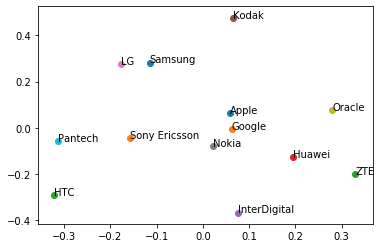

In [58]:
# Plot MDS model
xs, ys = pos[:,0], pos[:,1]
for x, y, name in zip(xs, ys, companyNames):
    plt.scatter(x, y)
    plt.text(x, y, name)

plt.show()


In [59]:
# Importing dendogram
from scipy.cluster.hierarchy import ward, dendrogram


{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [65.0, 65.0, 82.5, 82.5],
  [115.0, 115.0, 125.0, 125.0],
  [105.0, 105.0, 120.0, 120.0],
  [73.75, 73.75, 112.5, 112.5],
  [42.5, 42.5, 93.125, 93.125],
  [12.5, 12.5, 67.8125, 67.8125]],
 'dcoord': [[0.0, 0.17952235299923824, 0.17952235299923824, 0.0],
  [0.0, 0.8472078830867907, 0.8472078830867907, 0.17952235299923824],
  [0.0, 0.5885735750678985, 0.5885735750678985, 0.0],
  [0.0, 0.9236335973285749, 0.9236335973285749, 0.5885735750678985],
  [0.0, 0.219044836682617, 0.219044836682617, 0.0],
  [0.0, 0.3693074260316708, 0.3693074260316708, 0.219044836682617],
  [0.0, 0.7055166391650454, 0.7055166391650454, 0.3693074260316708],
  [0.0, 0.49759200597886555, 0.49759200597886555, 0.0],
  [0.0, 0.7542994167275818, 0.7542994167275818, 0.49759200597886555],
  [0.7055166391650454,
   1.1010991330752682,
   1.10109913

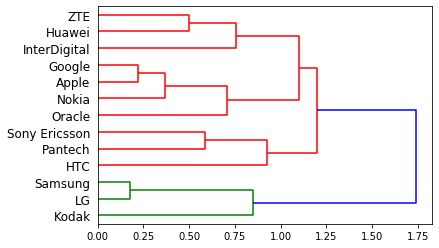

In [60]:
# Fit model Dendogram
linkage_matrix = ward(cos_dist)
dendrogram(linkage_matrix, orientation='right', labels=companyNames)


In [61]:
plt.tight_layout()
plt.show()


<Figure size 432x288 with 0 Axes>

In [62]:
# Import decomposition 
from sklearn import decomposition 

In [63]:
no_topics = 5
no_top_words = 20


In [64]:
#Fitting NMF model
clf = decomposition.NMF(n_components = no_topics, random_state=1)
doctopic = clf.fit_transform(sparse_matrix)


In [65]:
# Getting Features Name
vocab = vectorizer.get_feature_names()
vocab

['aa',
 'aaa',
 'aaah',
 'aaal',
 'aac',
 'aal',
 'aam',
 'ab',
 'abandoned',
 'abandoning',
 'abb',
 'abbreviate',
 'abbreviated',
 'abbreviation',
 'abc',
 'aberration',
 'abhesive',
 'ability',
 'abis',
 'ablate',
 'ablateable',
 'ablated',
 'ablating',
 'ablation',
 'ablative',
 'able',
 'abnormal',
 'abnormality',
 'abnormally',
 'abnormity',
 'abort',
 'aborted',
 'aborting',
 'abortion',
 'about',
 'abovementioned',
 'abr',
 'abrading',
 'abrasion',
 'abrasive',
 'abrupt',
 'abruptly',
 'abscissa',
 'absence',
 'absent',
 'abservers',
 'absolute',
 'absolutely',
 'absorb',
 'absorbance',
 'absorbed',
 'absorbency',
 'absorbent',
 'absorber',
 'absorbing',
 'absorbs',
 'absorption',
 'absorptive',
 'abstract',
 'abstracted',
 'abstracting',
 'abstraction',
 'abstractly',
 'abuse',
 'abut',
 'abuts',
 'abutting',
 'ac',
 'accelerate',
 'accelerated',
 'accelerates',
 'accelerating',
 'acceleration',
 'accelerator',
 'accelerometer',
 'accent',
 'accentuated',
 'accentuating',
 'ac

In [66]:
# Topics from NMF model
topic_words = []
for topic in clf.components_:
    word_index = np.argsort(topic)[::-1][0:no_top_words]
    topic_words.append([vocab[i] for i in word_index])

In [67]:
# Displaying NMF model
for t in range(len(topic_words)):
    print("Topic {}:{}".format(t, " ".join(topic_words[t][:15])))

Topic 0:method network service system signal invention control packet data device present communication gateway message terminal
Topic 1:image electrode layer method second device substrate display light data includes having pixel apparatus liquid
Topic 2:device second unit electronic remote host body plurality circuit portable system antenna communication tone method
Topic 3:system data method device user network second application object information includes based embodiment set associated
Topic 4:communication mobile terminal data signal method device channel information unit wireless antenna having power wtru


In [68]:
# Importing TruncatedSVD
from sklearn.decomposition import TruncatedSVD

In [69]:
# Generating topic from LSI model
def get_topics(model, vectorizer, model_name, lsi_df, top_n = 15):
    result = []
    for index, topic in enumerate(model.components_):
        topic_label = model_name + "_topic_" + str(index)
        score = "SCORE_" + str(index)
        aList = [(vectorizer.get_feature_names()[i], topic[i]) for i in topic.argsort()[:-top_n -1:-1]]
        
        l1,l2 = zip(*aList)
        lsi_df[topic_label] = l1
        lsi_df[score] = l2
        print(topic_label)
        print(" ".join(l1))
        
    print(lsi_df)
    #print(list(lsi_df[topic_label]))
    return lsi_df
print("LSI is performed...")
        
lsi_model = TruncatedSVD(n_components=5, n_iter = 5000)
lsi_Z = lsi_model.fit_transform(sparse_matrix)
        
print("Generating LSI Model .....")

output = get_topics(lsi_model, vectorizer, "LSI", pd.DataFrame())



LSI is performed...
Generating LSI Model .....
LSI_topic_0
method device data system communication second signal network information user includes terminal unit mobile image
LSI_topic_1
image electrode layer second light substrate display having liquid pixel organic color gate device film
LSI_topic_2
communication mobile unit terminal electronic device antenna remote portable second body host hinge tone circuit
LSI_topic_3
terminal signal mobile communication channel electrode layer wtru station crystal control wireless substrate display power
LSI_topic_4
wtru data signal code channel plurality received wireless unit apparatus electrode antenna transmit matrix receive
      LSI_topic_0   SCORE_0 LSI_topic_1   SCORE_1    LSI_topic_2   SCORE_2  \
0          method  0.339062       image  0.283662  communication  0.272238   
1          device  0.282521   electrode  0.272600         mobile  0.259336   
2            data  0.281218       layer  0.247743           unit  0.238458   
3          

In [70]:
# Importing LDA, count vectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

In [71]:
# populate Count vectorizer
cvectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=10000, stop_words='english')
num_topics = 5 #arbitrary
dtm = cvectorizer.fit_transform(docs)


In [72]:
# LDA Model
lda = LatentDirichletAllocation(n_components=num_topics, learning_method="batch",  max_iter=2000, random_state=0)
 
document_topics = lda.fit_transform(dtm)
feature_names = cvectorizer.get_feature_names()


In [73]:
# Displaying the model LDA
def display_topics(model, feature_names, n_top_words):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))

display_topics(lda, feature_names, 15)


Topic 0:
layer electrode substrate semiconductor display line light region gate image pattern provided forming surface transistor
Topic 1:
application node object embodiment message associated packet computer database file client provided code document storage
Topic 2:
display electrode layer substrate line liquid crystal pixel gate recording light panel provided film region
Topic 3:
image electronic display antenna element received said message frame provided content portable receiver audio video
Topic 4:
image layer color light material pixel printing element substrate ink sensor camera surface imaging print
